### Introduction to Random Variables and Statistical Distributions

In [113]:
from scipy.stats import bernoulli, poisson, binom, norm, mvn
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline

In [2]:
headimg = plt.imread('../data/quarterheads.jpg')
tailimg = plt.imread('../data/quartertails.jpg')

### Discrete random variables
A <i>discrete random</i> variable can take a finite number of possible values. A toss of a two-sided coin can be thought of as a random variable, or a roll of a 6 sided dice. 

#### Probability distributions for discrete random variables
A random variable is generated from a probability distribution. There are different types of distributions defined for discrete random variables. These include:
- Bernoulli distribution
- Binomial distribution
- Multinoulli distribution
- Poisson distribution


#### Bernoulli distribution
Bernoulli distribution represents a binary random variable which takes value 1 with success probability $p$ and value 0 with failure probability $q=1-p$. A bernoulli distribution has only one parameter: $p$.

[1]


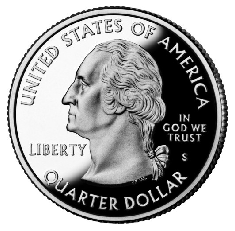

In [180]:
theta = 0.5
# let us draw a sample from a bernoulli distribution
b = bernoulli.rvs(theta,size=1)
print(b)
if b[0] == 0:
    plt.imshow(tailimg)
    plt.axis('off')
else:
    plt.imshow(headimg)
    plt.axis('off')
    

In [183]:
# you can also draw samples simultaneously
theta = 0.9
samples = bernoulli.rvs(theta,size=1000)
print(samples)
# count the number of successes (sample = 1). What happens when you change p?
print(np.count_nonzero(samples==1))

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 

Text(0.5, 0.98, 'Bernoulli probability')

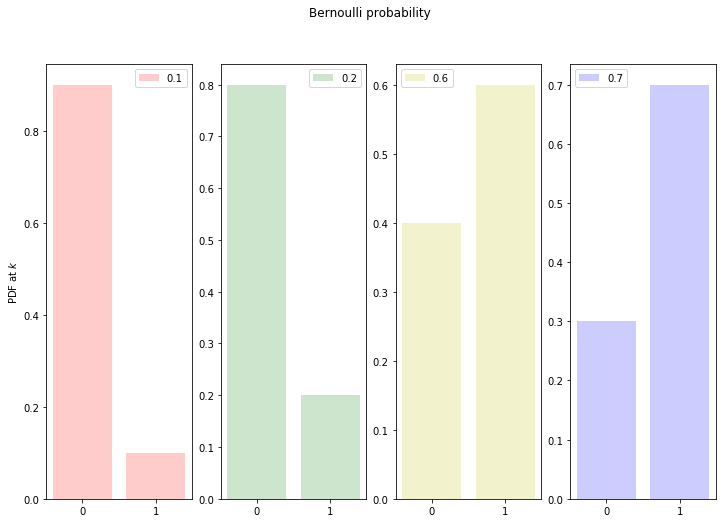

In [185]:
# plotting the probability mass function for the Bernoulli distribution
a = np.arange(2) # domain of the bernoulli variable

colors = ['r','g','y','b']
plt.figure(figsize=(12,8))
for i, theta in enumerate([0.1, 0.2, 0.6, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(a, bernoulli.pmf(a, theta), label=theta, color=colors[i], alpha=0.2)
    ax.xaxis.set_ticks(a)

    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
    

plt.suptitle("Bernoulli probability")

#### Binomial distribution
Another popular distribution for a discrete random variable is the <b>binomial distribution</b>. A binomial distribution has two parameters $n$ and $\theta$, where $0 \le \theta \le 1$. The sample generated by a binomial distribution denotes the number of successes observed in a sequence of $n$ binary trials (e.g., toss of a coin) when the probability of each success is $\theta$. 

The samples that are drawn from a binomial distribution range between 0 and $n$.

The probability distribution is defined as:
\begin{equation}
p(k;n,\theta) = P(X = k) = \binom{n}{k}\theta^k (1 - \theta)^{n-k}
\end{equation}


In [213]:
#sampling from a binomial distribution
sample = binom.rvs(20,0.9,1)
print(sample)

20


Text(0.5, 33.0, '$k$')

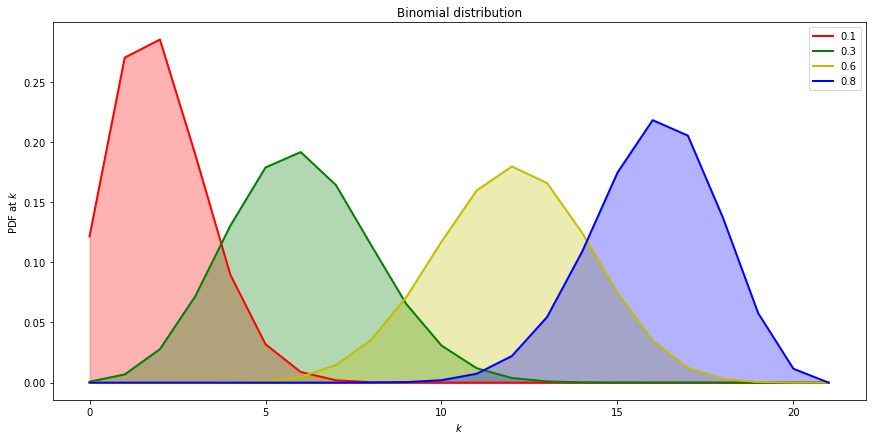

In [214]:
#plotting the pmf for a bernoulli distribution
plt.figure(figsize=(12,6))
k = np.arange(0, 22)
for p, color in zip([0.1, 0.3, 0.6, 0.8], colors):
    rv = binom(20, p)
    plt.plot(k, rv.pmf(k), lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.3)
plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")

#### Multinoulli distribution
A multinoulli distribution is a generalization of Bernoulli distribution for trials which can take more than two possibilities ($k > 2$). The parameter for multinoulli distribution is a vector ${\bf \theta}$ which has $k$ entries. Each entry $\theta_i$ indicates the probability of observing the category $i$ in a single trial.

In [216]:
[1/6.]*6

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [215]:
# generate samples from a multinoulli distribution. Essentially simulated a single roll of dice. Note that the output is a vector of length $k = 6$
np.random.multinomial(1, [1/6.]*6, size=1)


array([[0, 0, 0, 0, 0, 1]])

#### Multinomial distribution
A multinomial distribution is a generalization of Binomial distribution for trials which can take more than two possibilities. The parameters for the multinomial distribution is a vector ${\bf \theta}$ and $n$.


In [4]:
# generate samples from a multinomial distribution. Note that the output is a vector of length $k = 6$
np.random.multinomial(20, [1/6.]*6, size=1)


array([[4, 4, 4, 2, 4, 2]])

#### Poisson distribution
Typically used to model counts. Domain ($\chi$) is $0 ... \infty$. It has one parameter, $\lambda$.

The *probability mass function* is given as:
$P(X = k) = \frac{\lambda^ke^{-\lambda}}{k!}$.

The expected value or mean of $X$ is $\lambda$.

(0, 100)

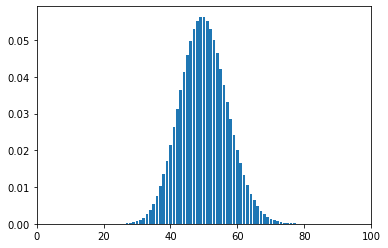

In [219]:
lambd = 50
rv = poisson(lambd)
# calculate the pmf for different values of k and plot
k = np.arange(100)
plt.bar(k,rv.pmf(k))
plt.xlim([0,100])

(0, 100)

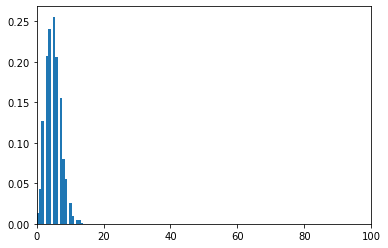

In [88]:
# generating samples from this distribution
samples = rv.rvs(1000)
h = plt.hist(samples,bins=20,density=True)
plt.xlim([0,100])

### Continuous random variables
A <i>continuous random</i> variable can take an infinite number of possible values. Several interesting distributions exist:
- alpha An alpha continuous random variable.
- beta A beta continuous random variable.
- gamma A gamma continuous random variable.
- expon An exponential continuous random variable.
- gauss Gaussian random variable

#### Gaussian distribution
One of the most popular distribution is the Gaussian distribution. This distribution is defined for any number of variables. For a single variable case, the distribution is defined using two parameters: $\mu$ and $\sigma$. $\mu$ or the <b>mean</b> can take any value and $\sigma$ or the <b>standard deviation</b> is $\ge 0$.

For a continuous distribution, you cannot compute the probability mass at any value of the random variable. Instead, you can compute the <i>density</i> using the <b>probability density function</b>:
$$p(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp[-\frac{1}{2}(\frac{x - \mu}{\sigma})^2]$$
The random variable represented using a Gaussian distribution can take any value from $-\infty$ to $\infty$.

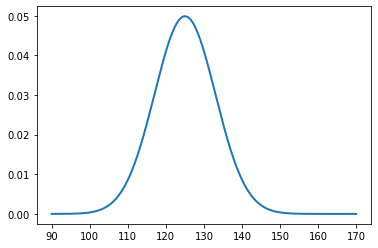

In [230]:
# set the parameters
mu = 125
sigma = 8
# draw 1000 samples from this distribution
#samples = norm(mu, sigma).rvs(1000)
# plot an empirical distribution, i.e., a histogram
#h = plt.hist(samples, 30, density=True, alpha=.3)

# Compute the density at several instances of the random variable
x = np.linspace(90, 170, 10001)
# plot the density
plt.plot(x, norm(mu, sigma).pdf(x), linewidth=2)


#### Real-world example
Consider heights and weights of a population sample

In [227]:
hw = pd.read_csv('../data/heightweight.csv')

Text(0.5, 0, 'Weight (lbs)')

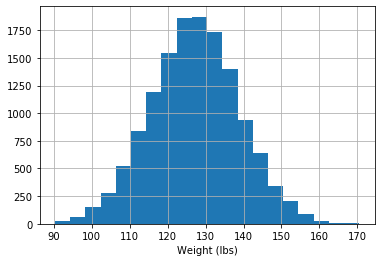

In [228]:
ax = plt.subplot(111)
hw['Weight'].hist(bins=20,ax=ax)
ax.set_xlabel('Weight (lbs)')

#### Multi-dimensional or multivariate Gaussian distribution
A distribution can be defined for multivariate random variables. One example is the multivariate Gaussian. In general, the random variable is a $D$ length vector ${\bf X}$. The two parameters of this distribution are a mean vector ${\bf \mu}$ and a covariance matrix $\Sigma$. The pdf at any value of ${\bf X}$ is given by:
$$
      \mathcal{N}({\bf X}| {\bf \mu,\Sigma}) \triangleq \frac{1}{(2\pi)^{D/2}|{\bf \Sigma}|^{D/2}}exp\left[-\frac{1}{2}{\bf (x-\mu)^\top\Sigma^{-1}(x-\mu)}\right]
$$
Note that if $D = 1$, it reduces to a univariate Gaussian distribution.

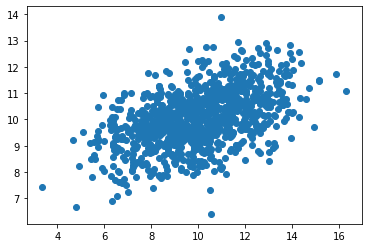

In [233]:
#define the parameters for D = 2
mu = np.array([10,10])
Sigma = np.array([[4,1.],[1.,1]])
rv = np.random.multivariate_normal(mu,Sigma)
#sample some points
s = np.random.multivariate_normal(mu,Sigma,1000)

fig = plt.figure()
plt.subplot(111)
plt.scatter(s[:,0],s[:,1])

# add a contour plot
smin = np.min(s,axis=0)
smax = np.max(s,axis=0)
t1=np.linspace(smin[0],smax[0],1000)
t2=np.linspace(smin[1],smax[1],1000)

# evaluate pdf at each of these mesh points


In [9]:
np.cov(s.transpose())

array([[  9.89485661e-01,  -1.43077154e-02],
       [ -1.43077154e-02,   9.97270669e+01]])